# **Providing data-driven suggestions for HR**

### Understand the business scenario and problem

This project involves analyzing HR data to provide actionable insights to improve employee retention within an organization. By constructing predictive models, the aim is to identify factors associated with employee turnover. The deliverables include model evaluations, data visualizations, and ethical considerations, culminating in a concise project summary and a comprehensive code notebook.They have the following question: what’s likely to make the employee leave the company?

The dataset that I'll be using in this contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

| Variable               | Description                                               |
|------------------------|-----------------------------------------------------------|
| satisfaction_level     | Employee-reported job satisfaction level [0–1]            |
| last_evaluation        | Score of employee's last performance review [0–1]         |
| number_project         | Number of projects employee contributes to                |
| average_monthly_hours  | Average number of hours employee worked per month         |
| time_spend_company     | How long the employee has been with the company (years)   |
| Work_accident          | Whether or not the employee experienced an accident while at work |
| left                   | Whether or not the employee left the company              |
| promotion_last_5years  | Whether or not the employee was promoted in the last 5 years |
| Department             | The employee's department                                 |
| salary                 | The employee's salary (U.S. dollars)                      |




## Imports

In [5]:
# Import packages

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# For data manipulation
import numpy as np
import pandas as pd
import scipy.stats as stats

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle


# Load dataset

In [7]:
# Load dataset into a dataframe

df0 = pd.read_csv("C:/Users/luke3/Documents/GitHub/Predictive-Modeling-for-Employee-Retention/data/HR_comma_sep.csv")

# Display first few rows of the dataframe

df0.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

# Data Exploration (Initial EDA and data cleaning)


## Gather basic information about the data

In [10]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Gather descriptive statistics about the data

In [12]:
# Gather descriptive statistics about the data

df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

## Rename columns

In [14]:
# Display all column names

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [15]:
# Rename columns as needed

df0 = df0.rename(columns={'Work_accident': 'work_accident',
                         'average_montly_hours': 'average_monthly_hours',
                         'time_spend_company': 'tenure',
                         'Department': 'department'})

# Display all column names after the update

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

## Check missing values

Check for any missing values in the data.

In [17]:
# Check for missing values

df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

## Check duplicates

In [19]:
# Check for duplicates

df0.duplicated().sum()

3008

In [20]:
# Inspect some rows containing duplicates as needed

df0[df0.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

In [21]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed

df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

## Check for outliers

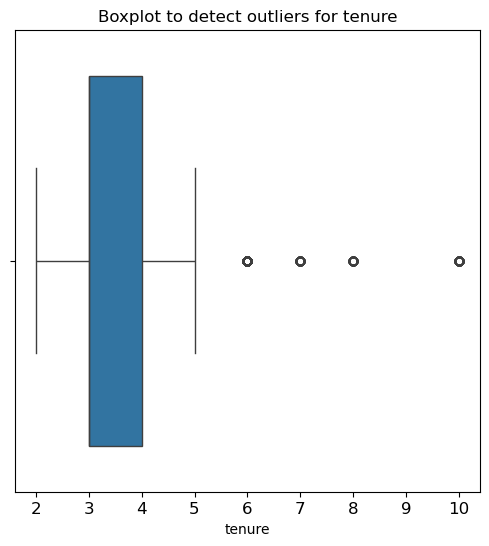

In [23]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [24]:
# Determine the number of rows containing outliers

percentile25=df1['tenure'].quantile(.25)

percentile75=df1['tenure'].quantile(.75)

iqr = percentile75 - percentile25

lower_limit = percentile25 - 1.5 * iqr
upper_limit = percentile75 + 1.5 * iqr

print('Lower Limit:', lower_limit)
print('Upper Limit:', upper_limit)

outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

print('Number of rows in the data containing outliers in "tenure":', len(outliers))

Lower Limit: 1.5
Upper Limit: 5.5
Number of rows in the data containing outliers in "tenure": 824


# Continue EDA (analyze relationships between variables)



In [26]:
# Get numbers of people who left vs. stayed

print(df1['left'].value_counts())
# Get percentages of people who left vs. stayed

print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


# Data visualizations 


## Monthly hours X Number of projects boxplot AND Number of Projects histogram


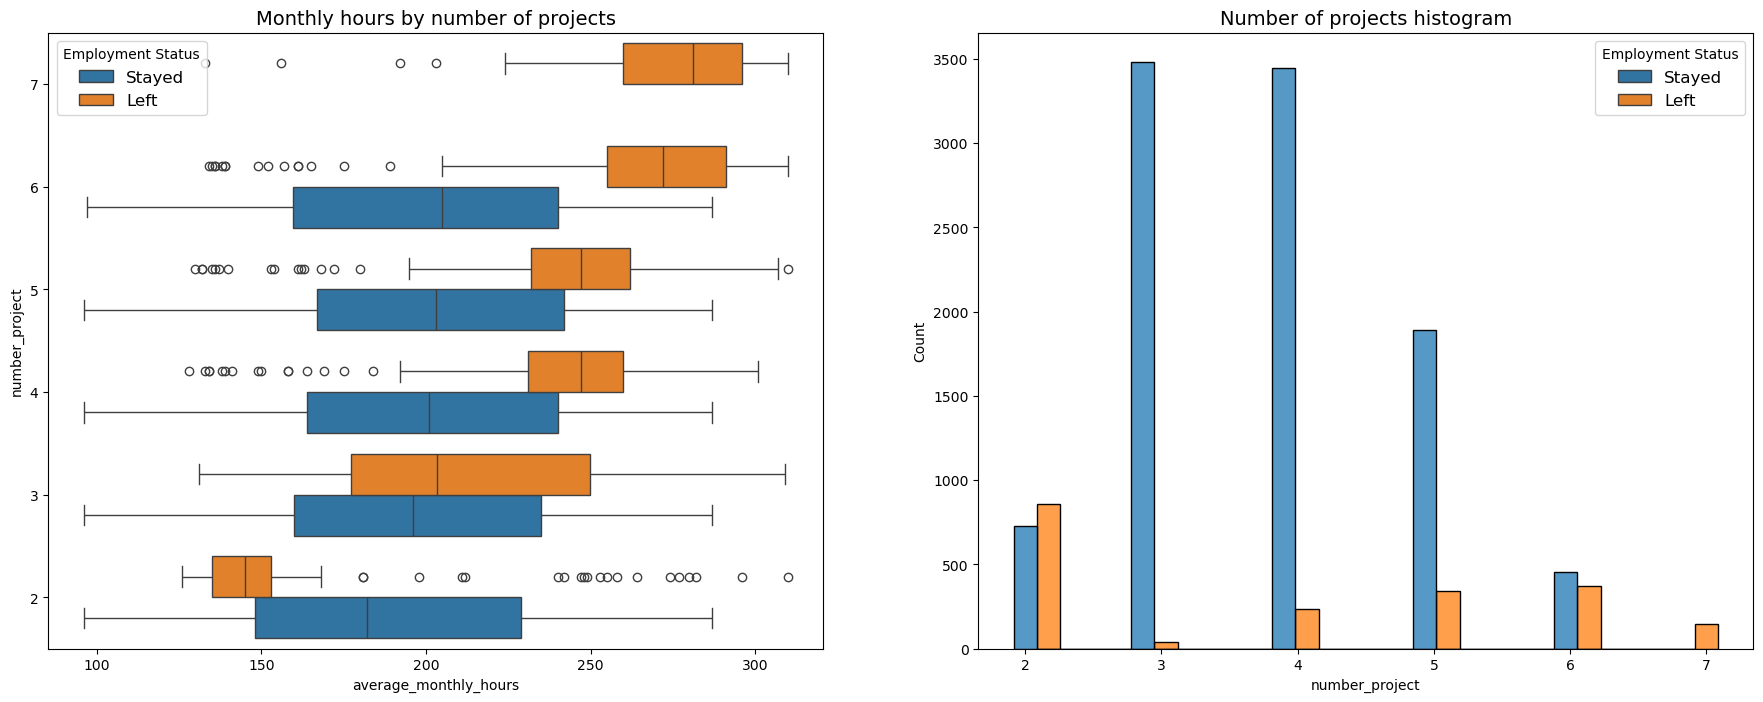

In [29]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')
# Get the current handles and labels
handles, labels = ax[0].get_legend_handles_labels()

# Define new labels
new_labels = ['Stayed', 'Left']

# Update the legend
ax[0].legend(handles, new_labels, title="Employment Status", fontsize='12')




# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Update the legend
ax[1].legend(handles, new_labels, title="Employment Status", fontsize='12')

# Display the plots
plt.show()

## Satisfaction X Project boxplot AND Satisfaction Histogram

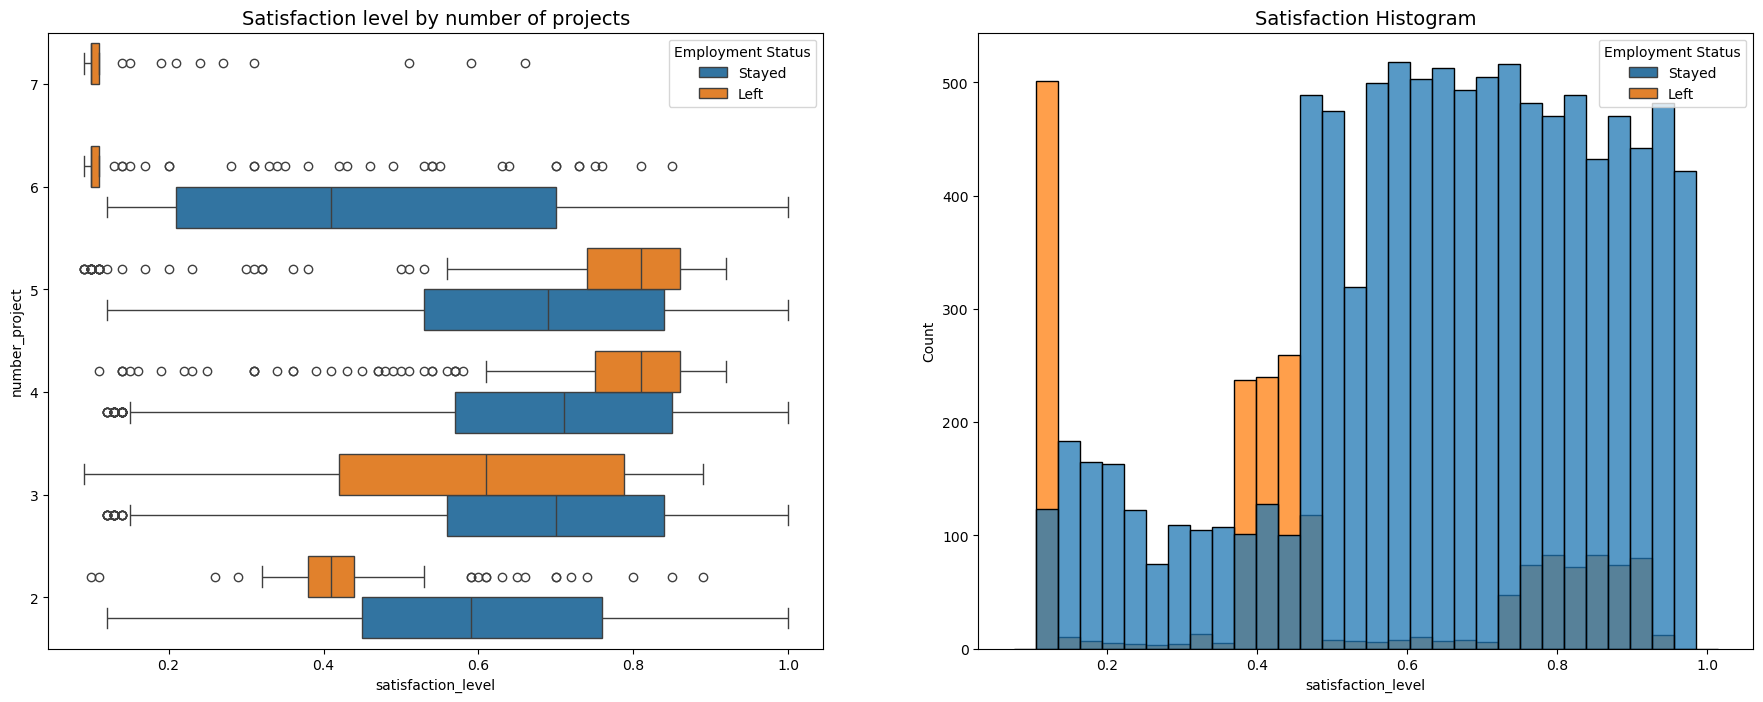

In [31]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `satisfaction_level` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction level by number of projects', fontsize='14')

# Get the current handles and labels
handles, labels = ax[0].get_legend_handles_labels()

# Define new labels
new_labels = ['Stayed', 'Left']

# Update the legend
ax[0].legend(handles, new_labels, title="Employment Status")



# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
sns.histplot(data=df1, x='satisfaction_level', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Satisfaction Histogram', fontsize='14')

# Update the legend
ax[1].legend(handles, new_labels, title="Employment Status")

# Display the plots
plt.show();

In [32]:
# Investigating projects vs employee staying/leaving

print(df1[df1['number_project']==6]['left'].value_counts())
print(df1[df1['number_project']==7]['left'].value_counts())

left
0    455
1    371
Name: count, dtype: int64
left
1    145
Name: count, dtype: int64


### All employees with 7 projects left the company, while almost 50% of the employees with 6 left as well.

### Creating a visual to show if 'work_accident' has an impact on retention


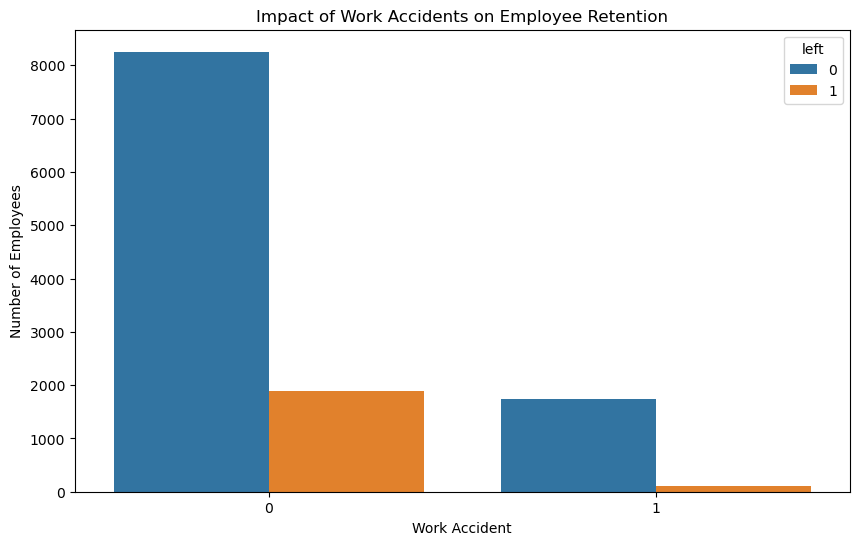

In [35]:
# Group the data by 'work_accident' and 'left', and calculate the count
counts = df1.groupby(['work_accident', 'left']).size().reset_index(name='count')

# Convert categorical columns to strings for plotting
counts['work_accident'] = counts['work_accident'].astype(str)
counts['left'] = counts['left'].astype(str)

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=counts, x='work_accident', y='count', hue='left')

# Adding labels and title
plt.title('Impact of Work Accidents on Employee Retention')
plt.xlabel('Work Accident')
plt.ylabel('Number of Employees')


# Show plot
plt.show()

### Work Accidents don't really seem to have much of an impact on employee retention, potentially even making people more likely to stay?

## Satisfaction X Tenure boxplot AND Tenure Histogram


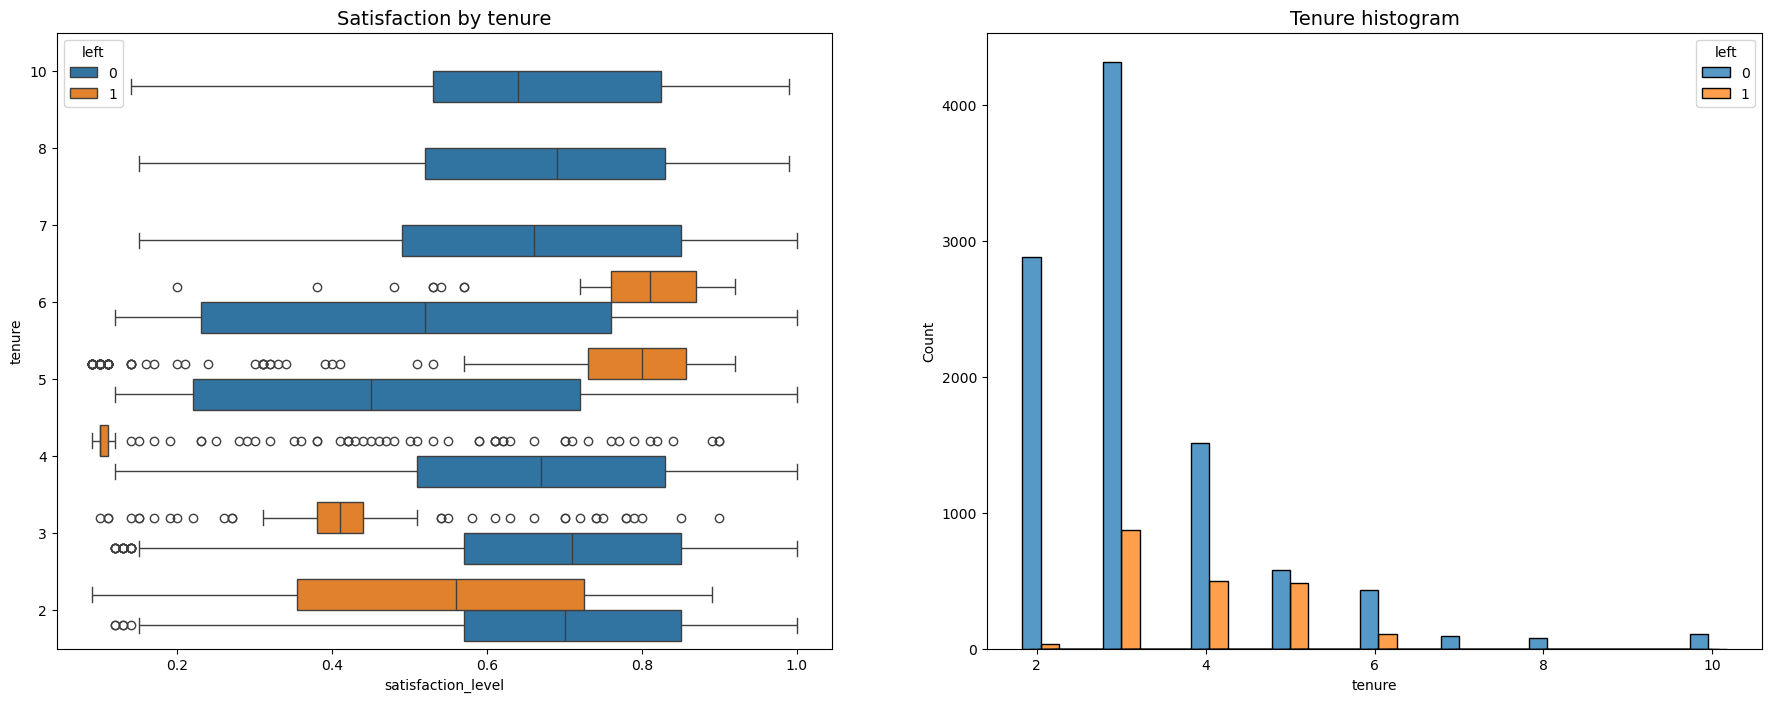

In [38]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

## Scatterplot showing relationship between average monthly hours and last evaluation score


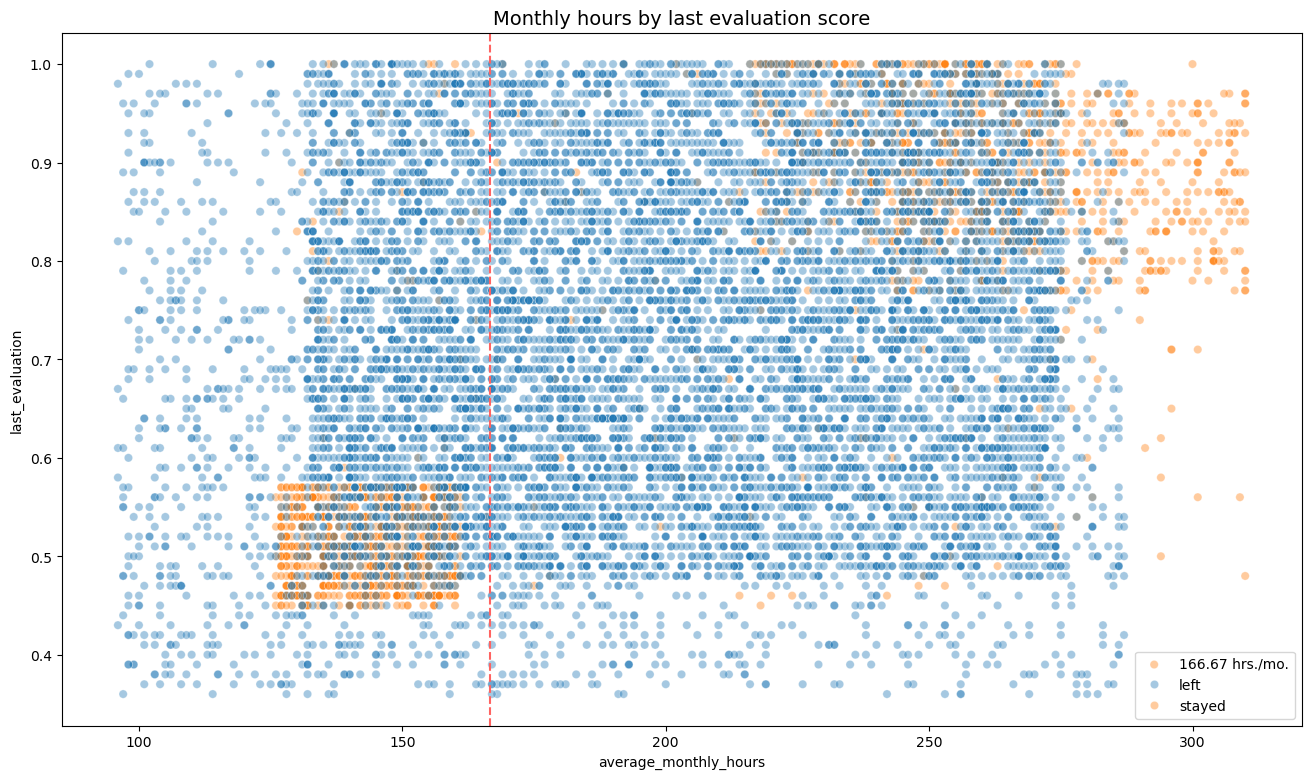

In [40]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

## Correlation Heatmap

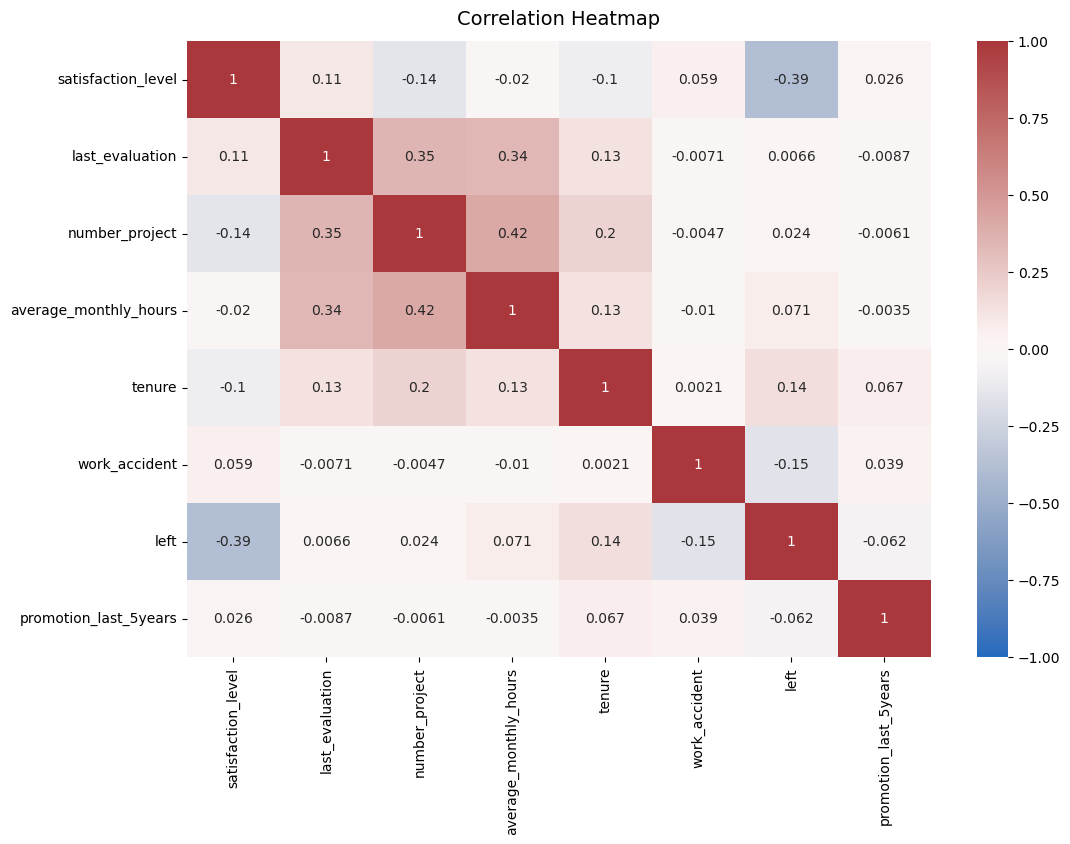

In [42]:
# Filter the DataFrame to include only numeric columns
numeric_df = df0.select_dtypes(include=['float64', 'int64'])

# Ensure there are no missing values that could disrupt the correlation matrix
numeric_df = numeric_df.dropna()

# Clear any previous plots
plt.clf()
plt.close('all')

# Plot a correlation heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

# Show plot
plt.show()

# Insights

A lot of the employees that left the company were on the high end of being overworked, while another good portion of them were slightly underworked but received lower than expected evaluation scores. 

No employee that has been at the company more than 6 years has left.

Work accidents don't seem to have any real impact on whether an employee stays or leaves.

Employees satisfaction levels drop significantly once they have more than 6 projects to work on.


## Model Building

### Identify the type of prediction task.

The prediction requested is a binomial outcome, left or stayed. The outcome will be categorical.

Since it is a categorical outcome, a Log Regression model or Tree-based model will be the best approach.

## Modeling Approach: Tree-based Model

### Converting categories and getting dummies

In [45]:
df = df1.copy()

df['salary'] = (
    df['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

df = pd.get_dummies(df, drop_first=False)

df.head(5)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
1       6              0     1                      0       1          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [46]:
#isolate outcome variable
y = df['left']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [47]:
# Select the features

X = df.drop('left', axis=1)

X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
1       6              0                      0       1          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [48]:
# Split the data into train / test / split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)

## Decision Tree 1

In [50]:
# Instantiate the model
tree = DecisionTreeClassifier(random_state=0)

# Create hyperparamaters
cv_params = {'max_depth': [4, 6, 8, None],
            'min_samples_leaf': [2, 5, 1],
            'min_samples_split': [2, 4, 6]
            }

# Assign dictionary of scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [51]:
%%time
tree1.fit(X_train, y_train)

CPU times: total: 2.89 s
Wall time: 3.19 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict'),
                      'roc_auc': make_scorer(roc_auc_score, response_method='predict')})

In [52]:
# Check best parameters

tree1.best_params_

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [53]:
# Check best AUC on CV

tree1.best_score_

0.9548070613085594

In [54]:
def make_results(model_name:str, model_object, metric:str):
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [55]:
# Get cv scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

model  precision    recall       F1  accuracy       auc
0  decision tree cv   0.971662  0.914947  0.94238   0.98143  0.954807

## Random Forest 1

In [57]:
# Instantiate the model
rf = RandomForestClassifier(random_state=0)

# Create hyperparamaters
cv_params = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500]
            }

# Assign dictionary of scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [58]:
%%time
rf1.fit(X_train, y_train)

CPU times: total: 15min 33s
Wall time: 16min 27s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict'),
                      'roc_auc': make_scorer(roc_auc_score, response_method='predict')})

In [59]:
# Save and pickle the model

path = 'models'

In [60]:
def write_pickle(path, model_object, save_as:str):
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)
    
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    return model

In [61]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

# Read pickle
read_pickle(path, 'hr_rf1')

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict'),
                      'roc_auc': make_scorer(roc_auc_score, response_method='predict')})

In [62]:
# Check best AUC score
rf1.best_score_

0.9560746240197273

In [63]:
# Check best params
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

## Compare DT1 and RF1 CV scores

In [65]:
# Get all cv scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall       F1  accuracy       auc
0  decision tree cv   0.971662  0.914947  0.94238   0.98143  0.954807
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.984833  0.914949  0.948572  0.983543  0.956075


In [66]:
def get_scores(model_name:str, model, X_test_data, y_test_data):

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

## Random Forest 1 Test Scores

In [68]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.991361  0.921687  0.955255  0.985657  0.960043

# Feature Engineering

In [70]:
## Drop satisfaction level, could possibly be misleading as employees planning on leaving will work fewer hours

df_edit = df.drop('satisfaction_level', axis=1)

df_edit.head(5)

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0          False   
1              0     1                      0       1          False   
2              0     1                      0       1          False   
3              0     1                      0       0          False   
4              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [71]:
# Rework overworked feature

df_edit['overworked'] = df_edit['average_monthly_hours']

print('Max hours:', df_edit['overworked'].max())
print('Min hours:', df_edit['overworked'].min())

Max hours: 310
Min hours: 96


In [72]:
df_edit['overworked'] = (df_edit['overworked'] > 175).astype(int)

df_edit['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

In [73]:
df_edit = df_edit.drop('average_monthly_hours', axis=1)
df_edit.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0          False             False   
1                      0       1          False             False   
2                      0       1          False             False   
3                      0       0          False             False   
4                      0       0          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  overworked  
0               False                 False           0  
1               False                 False           1  
2               False                 False           1  
3               False                 False           1  
4               False                 False           0

## Re split, train, test with random forest and decision tree on the modified data frame with the changed 'overworked' variable

In [75]:
y = df_edit['left']

X = df_edit.drop('left', axis=1)

In [76]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, random_state=0)


In [77]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth':[4,6,8,None],
             'min_samples_leaf': [2,5,1],
             'min_samples_split': [2,4,6]
            }

# Assign scoring dictionary
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [78]:
%%time
tree2.fit(X_train, y_train)

CPU times: total: 2.33 s
Wall time: 2.38 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict'),
                      'roc_auc': make_scorer(roc_auc_score, response_method='predict')})

In [79]:
# Check best params and AUC score
print(tree2.best_params_)
print(tree2.best_score_)

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}
0.9365100103702217


## Compare Decision Trees

In [81]:
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall       F1  accuracy       auc
0  decision tree cv   0.971662  0.914947  0.94238   0.98143  0.954807
               model  precision    recall        F1  accuracy      auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.93651


## Random Forest 2

In [83]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc') 

In [84]:
%%time
rf2.fit(X_train, y_train)

CPU times: total: 10min 54s
Wall time: 11min 17s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict'),
                      'roc_auc': make_scorer(roc_auc_score, response_method='predict')})

In [85]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [86]:
# Check best params
rf2.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [87]:
# Check best AUC score on CV
rf2.best_score_

0.9350040324392004

In [88]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)


               model  precision    recall        F1  accuracy      auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.93651
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv   0.910057  0.887475  0.898603  0.966752  0.935004


## Random Forest 2 Test Scores

In [90]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest2 test   0.900407  0.889558  0.894949   0.96531  0.934979

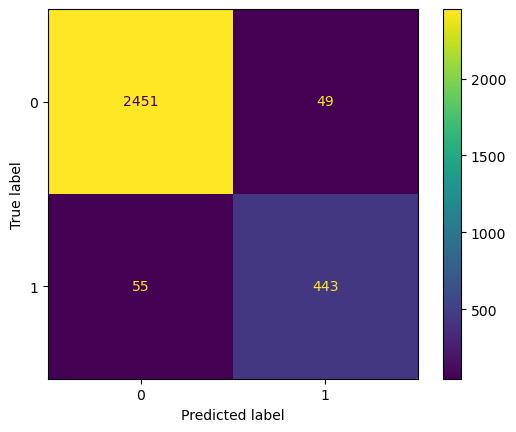

In [91]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

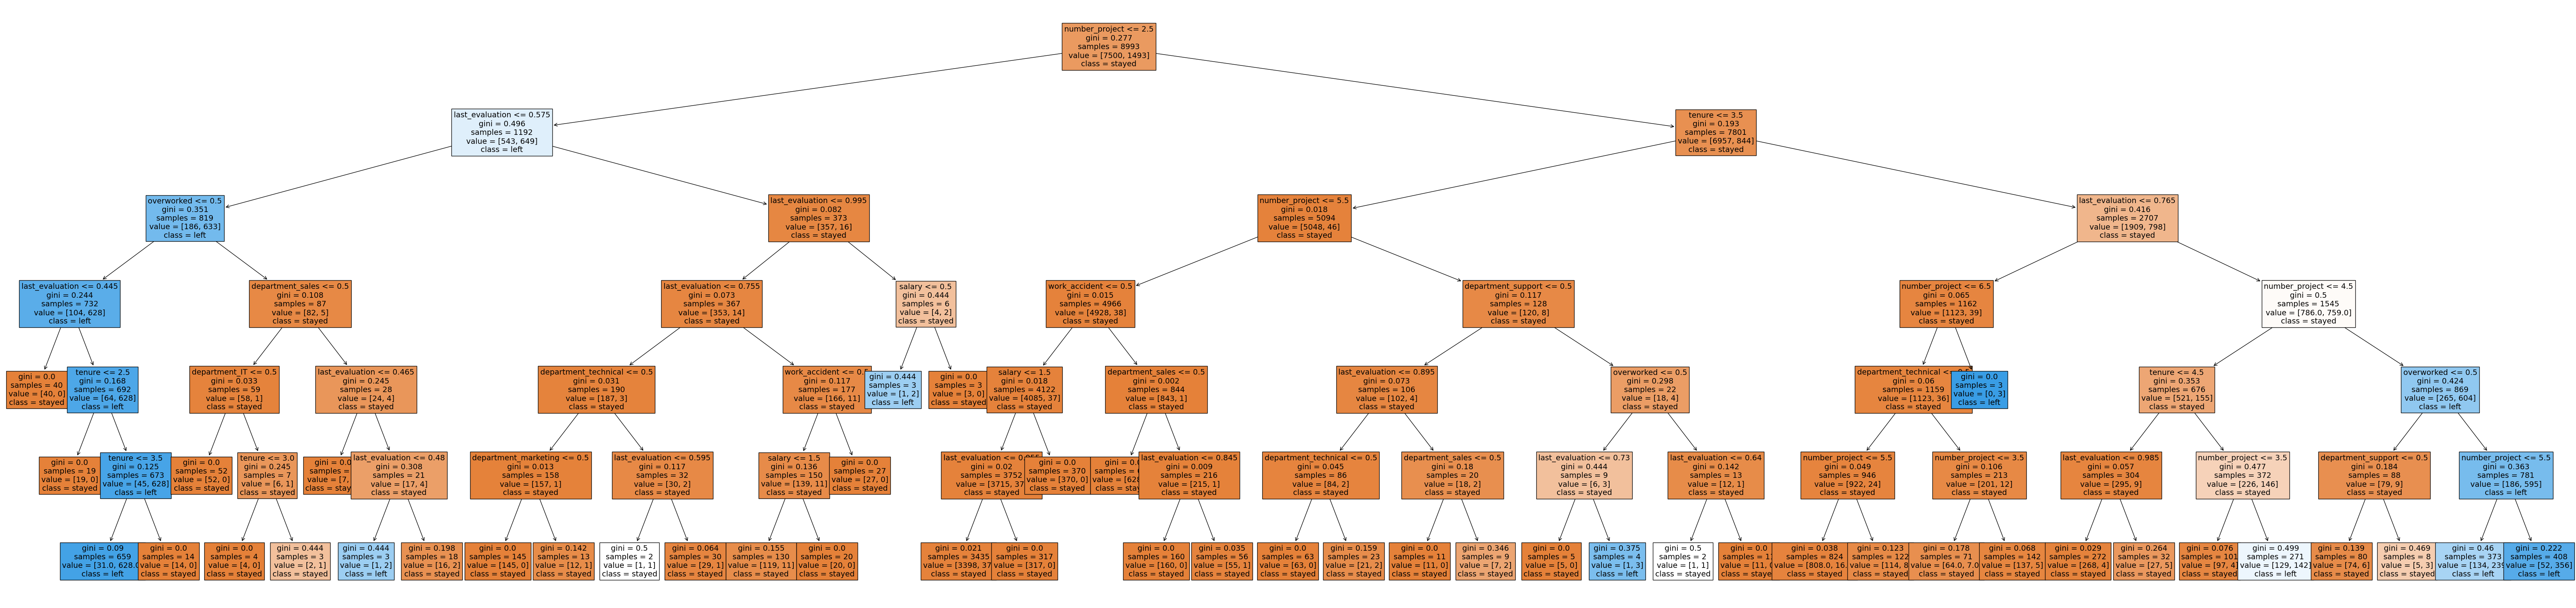

In [92]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

# Feature Importance

In [94]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
last_evaluation              0.343958
number_project               0.343385
tenure                       0.215681
overworked                   0.093498
department_support           0.001142
salary                       0.000910
department_sales             0.000607
department_technical         0.000418
work_accident                0.000183
department_IT                0.000139
department_marketing         0.000078

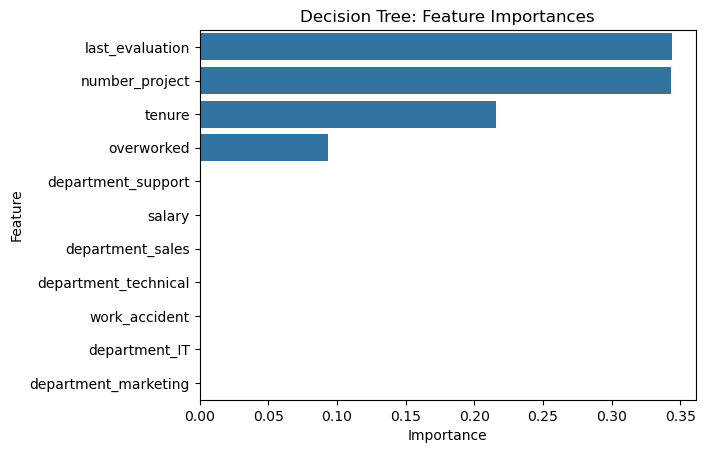

In [95]:
# Barplot to show Decision Tree feature importances

sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

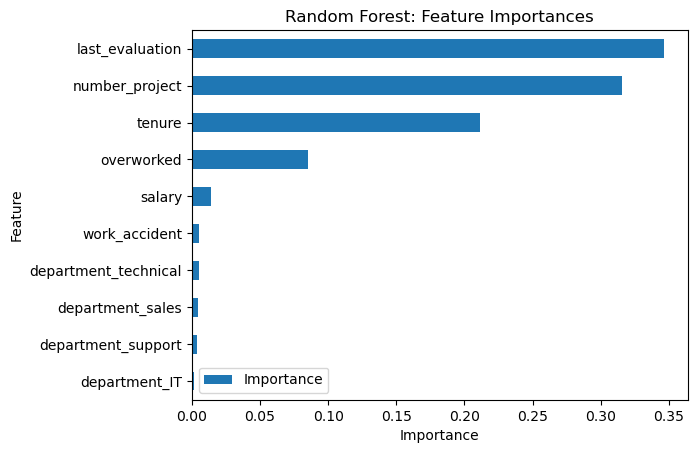

In [96]:
# Barplot to show Random Forest feature importances

# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

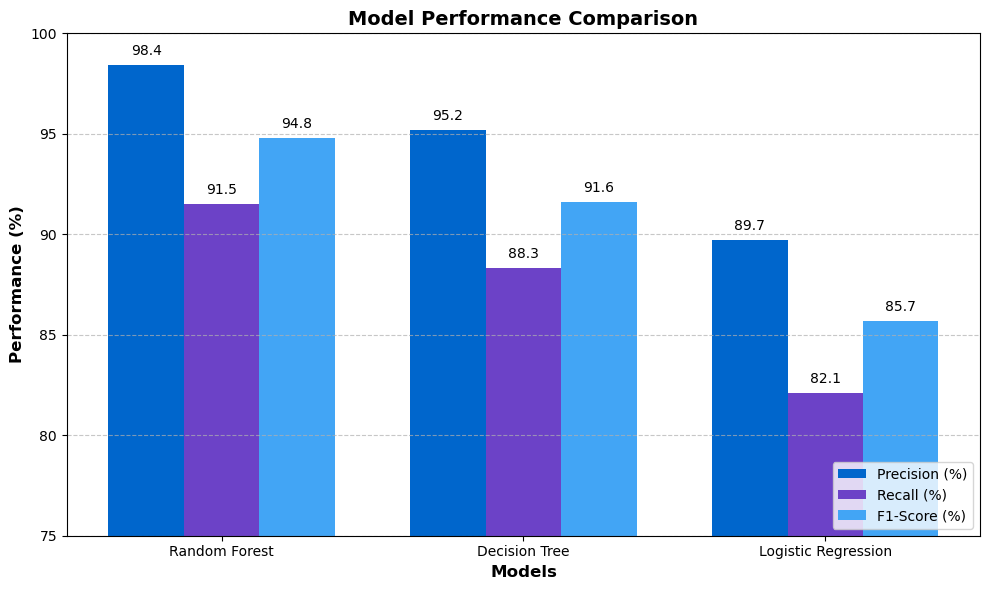

In [100]:
# Model performance metrics
models = ['Random Forest', 'Decision Tree', 'Logistic Regression']
precision = [98.4, 95.2, 89.7]
recall = [91.5, 88.3, 82.1]
f1_score = [94.8, 91.6, 85.7]

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Set width of bars
barWidth = 0.25
positions = np.arange(len(models))

# Create bars
plt.bar(positions - barWidth, precision, width=barWidth, color='#0066cc', label='Precision (%)')
plt.bar(positions, recall, width=barWidth, color='#6c42c7', label='Recall (%)')
plt.bar(positions + barWidth, f1_score, width=barWidth, color='#42a5f5', label='F1-Score (%)')

# Add labels and title
plt.xlabel('Models', fontweight='bold', fontsize=12)
plt.ylabel('Performance (%)', fontweight='bold', fontsize=12)
plt.title('Model Performance Comparison', fontweight='bold', fontsize=14)
plt.xticks(positions, models)
plt.ylim(75, 100)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend(loc='lower right')

# Add value labels on top of bars
for i, v in enumerate(precision):
    plt.text(i - barWidth, v + 0.5, str(v), ha='center')
for i, v in enumerate(recall):
    plt.text(i, v + 0.5, str(v), ha='center')
for i, v in enumerate(f1_score):
    plt.text(i + barWidth, v + 0.5, str(v), ha='center')

# Save the figure
plt.tight_layout()
plt.savefig('employee-model-performance.jpg', dpi=300)
plt.show()

## Results and Evaluation




**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.7%, precision of 85.7%, recall of 90.4%, f1-score of 87.9%, and accuracy of 95.9%, on the test set. \
The random forest modestly outperformed the decision tree model. 

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on. (5 or 6 projects at maximum, I'd suggest 5 and see the effects of that initially)
* Conduct further investigation about why four-year tenured employees are so dissatisfied, potentially a low amount of 4-year employees? If that's the case, why?
* Figure out a way to have employees work less, or reward them adequately for working more.
* Possibly restructure environment, make sure employees don't feel the need to be overworked, potentially an understaffed issue or workflow efficiency problem?
* High evaluation scores shouldn't be so correlated with being overworked. Consider implementing team rewards so individuals don't feel the need to work so much more than is needed.
